In [38]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

import pandas as pd
#import h5py
import cv2
import os
import random


%matplotlib inline

In [39]:

def load_images_from_folder(folder):
    images = []
    #images=np.array([])
    img_category=[]
    #x = np.array([np.array(Image.open(fname)) for fname in filelist])
    for filename in os.listdir(folder):
                
        img = np.array(cv2.imread(os.path.join(folder,filename)))
        img=cv2.resize(img,dsize=(64,64))
        #images=np.concatenate(images,img)
        #.reshape((1, 64*64*3)).T
        

        if img is not None:
            category = filename.split('.')[0]
            img_category.append(category)
            images.append(img)
            
    #shuffle the dataset
    shuffle_data=list(zip(images,img_category))
    random.shuffle(shuffle_data) 
    
    images=[t[0] for t in shuffle_data]
    img_category=[t[1] for t in shuffle_data]
            
    images=np.array(images)
    img_category=np.array(img_category)
    img_category=img_category.reshape(1,img_category.shape[0])
    #print(img_category.shape)
    #print(img_category)
    #print(images.shape)

    #print(type(images))
    #print(len(images))
    #print(images[0])
    
    #return images 
    #df = pd.DataFrame({'images': images,'category': img_category})
    #return df
    
    return images,img_category
    
    
def load_dataset():
    '''
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")

    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    '''
    
    #train_dataset=load_images_from_folder("dataset/training_set")
    #print(train_dataset)
    
    #train_set_x_orig = np.array(train_dataset["images"][:]) # your train set features
    train_set_x_orig, train_set_y_orig =load_images_from_folder("dataset/training_set")
    #print(type(train_set_x_orig[0]))
    #train_set_y_orig = np.array(train_dataset["category"][:]) # your train set labels
    #print(train_set_y_orig)

    #test_dataset=load_images_from_folder("dataset/test_set")
    test_set_x_orig,test_set_y_orig=load_images_from_folder("dataset/test_set")
    #test_set_x_orig = np.array(test_dataset["images"][:]) # your train set features
    #test_set_y_orig = np.array(test_dataset["category"][:]) # your train set labels   
    #print(test_set_y_orig)
    
    
    #return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig
    

In [40]:
#train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y=load_dataset()

In [41]:
#pickling of the numpy array
train_set_x_orig.dump('train_set_x_orig.npy')
train_set_y.dump('train_set_y.npy')
test_set_x_orig.dump('test_set_x_orig.npy')
test_set_y.dump('test_set_y.npy')

In [42]:
#loading np array back

train_set_x_orig=np.load('train_set_x_orig.npy')
train_set_y=np.load('train_set_y.npy')
#print(train_set_y)
test_set_x_orig=np.load('test_set_x_orig.npy')
test_set_y=np.load('test_set_y.npy')

In [43]:
#converting cat->1 and dog->0
#train_set_y.replace('cat':1,'dog':0)
train_set_y[train_set_y=='cat']=1
train_set_y[train_set_y=='dog']=0
train_set_y=train_set_y.astype(np.int)
print(train_set_y)

test_set_y[test_set_y=='cat']=1
test_set_y[test_set_y=='dog']=0
test_set_y=test_set_y.astype(np.int)
print(test_set_y)

[[1 1 1 ... 1 0 1]]
[[1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1
  1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1
  1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1
  0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0
  0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
  0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0]]


It is a 0 image


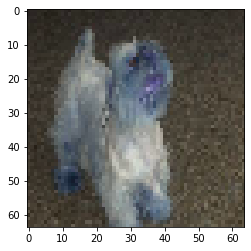

In [44]:
index = 20
plt.imshow(train_set_x_orig[index])
#print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")
print("It is a "+str(train_set_y[0][index])+" image")

In [45]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
#print(train_set_x_orig[0].shape)
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 1200
Number of testing examples: m_test = 200
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (1200, 64, 64, 3)
train_set_y shape: (1, 1200)
test_set_x shape: (200, 64, 64, 3)
test_set_y shape: (1, 200)


In [46]:
'''
Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px * num_px * 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b*c*d, a) is to use:

X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
'''


train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0])) #????

train_set_x_flatten shape: (12288, 1200)
train_set_y shape: (1, 1200)
test_set_x_flatten shape: (12288, 200)
test_set_y shape: (1, 200)
sanity check after reshaping: [70 72 73 73 75]


In [47]:
'''
One common preprocessing step in machine learning is to center and standardize your dataset, 
meaning that you substract the mean of the whole numpy array from each example, 
and then divide each example by the standard deviation of the whole numpy array. 
But for picture datasets, it is simpler and more convenient and works almost as 
well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).
'''


train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [48]:
#sigmoid-activation function

#z would be an np array of dimensions(1,no_of_training_examples)
def sigmoid(z):
    
    s=1/(1+np.exp(-z))
    
    return s

#print(sigmoid(np.array([0.5,2])))
    

In [49]:
def initialize_with_zeros(dim):
    w=np.zeros(shape=(dim,1))
    b=0
    
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b
    
w,b=initialize_with_zeros(2)  


#print('W=',w)
#print('b=',b)

In [50]:
def propogate(w,b,X,Y):
    '''
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    '''
    m=X.shape[1]
    #print(m)
    A = sigmoid( w.T @ X + b )   
    # If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.

    
    #forward propogation
    #A=sigmoid(np.dot(w.T,X)+b)   #activation function
    #cost function J
    cost=-(1/m)*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))
    #print(A)
    
    #backward propogation
    #dw=(1/m)*(X@(A-Y).T)
    dw=(1/m)*(np.dot(X,(A-Y).T))
    db = (1/m) * np.sum(A - Y)
    
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    #numpy.squeeze() function is used when we want to remove single-dimensional entries from the shape of an array.
    cost=np.squeeze(cost)
    assert(cost.shape==())
    #print(dw)
    
    grads={"dw":dw,"db":db}
    
    return grads,cost
    

In [51]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads,cost=propogate(w,b,X,Y)

print("dw:",grads['dw'])
print("db:",grads['db'])
print("cost:",cost)

dw: [[0.99845601]
 [2.39507239]]
db: 0.001455578136784208
cost: 5.801545319394553


In [52]:
#update the parameters using gradient descent.

def optimize(w,b,X,Y,no_iterations,learning_rate,print_cost=False):
    
    '''
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    '''
    
    costs=[]
    
    for i in range(no_iterations):
        
        grads,cost=propogate(w,b,X,Y)
        
        dw=grads['dw']
        db=grads['db']
    
        w=w-learning_rate*dw
        b=b-learning_rate*db
    
        if i%100==0:
            costs.append(cost)
            
        if print_cost and i%100==0:
            print("Cost after iteration %i: %f"%(i,cost))
            
    params={'w':w,'b':b}
        
    return params,grads,costs


'''
params,grads,costs=optimize(w,b,X,Y,100,0.009,True)
print("w:",params['w'])
print("b:",params['b'])
print("dw:",grads['dw'])
print("db:",grads['db'])
            
'''
    
    
    
    
    
    
    

'\nparams,grads,costs=optimize(w,b,X,Y,100,0.009,True)\nprint("w:",params[\'w\'])\nprint("b:",params[\'b\'])\nprint("dw:",grads[\'dw\'])\nprint("db:",grads[\'db\'])\n            \n'

In [53]:
def predict(w,b,X):
    '''
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    
    
    A=sigmoid(w.T@X+b)
    
    for i in range(A.shape[1]):
        Y_prediction[:, i] = (A[:, i] > 0.5) * 1
    
    #print(Y_prediction)
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [54]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [55]:
def model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
    '''
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    '''
    
    
    w,b=initialize_with_zeros(X_train.shape[0])
    
    parameters,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    w=parameters['w']
    b=parameters['b']
    
    y_prediction_train=predict(w,b,X_train)
    y_prediction_test=predict(w,b,X_test)
    
    
    
    print("Train accuracy:{}%".format(100-np.mean(np.abs(y_prediction_train-Y_train))*100))
    #print(y_prediction_test.shape,Y_test.shape)
    print("Test accuracy:{}%".format(100-np.mean(np.abs(y_prediction_test-Y_test))*100))
    
    d = {"costs": costs,
         "y_prediction_test": y_prediction_test, 
         "y_prediction_train" : y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [56]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.282246
Cost after iteration 200: 1.185834
Cost after iteration 300: 1.118323
Cost after iteration 400: 1.066347
Cost after iteration 500: 1.023784
Cost after iteration 600: 0.987624
Cost after iteration 700: 0.956103
Cost after iteration 800: 0.928063
Cost after iteration 900: 0.902703
Cost after iteration 1000: 0.879452
Cost after iteration 1100: 0.857897
Cost after iteration 1200: 0.837732
Cost after iteration 1300: 0.818723
Cost after iteration 1400: 0.800691
Cost after iteration 1500: 0.783491
Cost after iteration 1600: 0.767007
Cost after iteration 1700: 0.751144
Cost after iteration 1800: 0.735822
Cost after iteration 1900: 0.720979
Train accuracy:63.0%
Test accuracy:54.0%


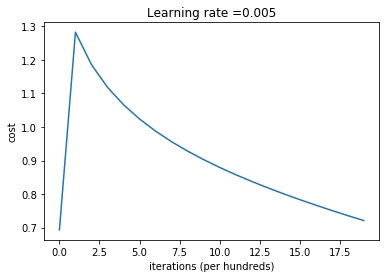

In [57]:
costs = np.squeeze(d['costs'])
#print(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
Train accuracy:59.0%
Test accuracy:54.5%

-------------------------------------------------------

learning rate is: 0.001
Train accuracy:70.75%
Test accuracy:54.0%

-------------------------------------------------------

learning rate is: 0.0001
Train accuracy:63.416666666666664%
Test accuracy:52.0%

-------------------------------------------------------



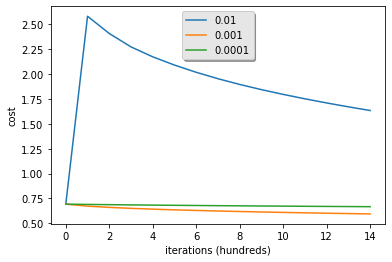

In [58]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


[16 25 28]
(64, 64, 3)
[16] [25] [28]
(12288, 1)
[[0.]]


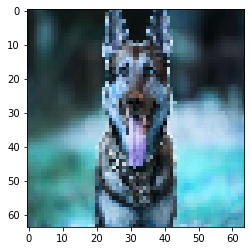

In [59]:

my_image = "dog_test.jpg"   

img = np.array(cv2.imread(my_image))
img=cv2.resize(img,dsize=(64,64))
print(img[0][0])
print(img.shape)
plt.imshow(img)
img=img.reshape((1,64*64*3)).T
print(img[0],img[1],img[2])
print(img.shape)

my_predicted_image = predict(d["w"], d["b"], img)
print(my_predicted_image)


#print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")